<a href="https://colab.research.google.com/github/4graf/Data_Processing/blob/main/ML/%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D0%BF%D1%80%D0%B8%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
# from sklearn.svm import LinearSVC
# import cv2

In [ ]:
-(0.3*np.log2(0.3)+0.05*np.log2(0.05)+0.15*np.log2(0.15)+0.2*np.log2(0.2)*2+0.1*np.log2(0.1))

2.4086949695628417

In [ ]:
-(0.3/0.5*np.log2(0.3/0.5)+0.05/0.5*np.log2(0.05/0.5)+0.15/0.5*np.log2(0.15/0.5))

1.295461844238322

In [ ]:
-(0.2/0.5*np.log2(0.2/0.5)*2+0.1/0.5*np.log2(0.1/0.5))

1.5219280948873621

In [ ]:
-(0.3/0.5*np.log2(0.3/0.5)+0.05/0.5*np.log2(0.05/0.5)+0.15/0.5*np.log2(0.15/0.5)) * 0.5 + -(0.2/0.5*np.log2(0.2/0.5)*2+0.1/0.5*np.log2(0.1/0.5)) * 0.5

1.4086949695628421

In [ ]:
def H(p:list):
    return -sum([pi*np.log2(pi) for pi in p])

h_theta = H([0.5, 0.15, 0.35])
omega_1 = [0.3, 0.05, 0.15]
omega_2 = [0.2, 0.1, 0.2]
h_omega_1 = H(list(map(lambda x: x/sum(omega_1), omega_1)))
h_omega_2 = H(list(map(lambda x: x/sum(omega_2), omega_2)))
h_omega_if_theta = h_omega_1 * sum(omega_1) + h_omega_2 * sum(omega_2)
h_theta-h_omega_if_theta

0.031950480052504115

In [ ]:
H([3/5, 2/5])

0.9709505944546686

In [ ]:
sum(2**x for x in range(8))
128*1+126*3+1*2
508/2

254.0

# SKLEARN

In [ ]:
! head -3 diabetes.csv

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


In [ ]:
df = pd.read_csv('diabetes.csv')
df[0:560]['Outcome'][df['Outcome'] == 0].count()

365

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[0:560, 0:-1], df.iloc[0:560, -1],
                                                    train_size=0.8, shuffle=False)
clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10,
                             max_leaf_nodes=15, random_state=2020)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=15,
                       min_samples_leaf=10, random_state=2020)

In [ ]:
clf.get_depth()

9

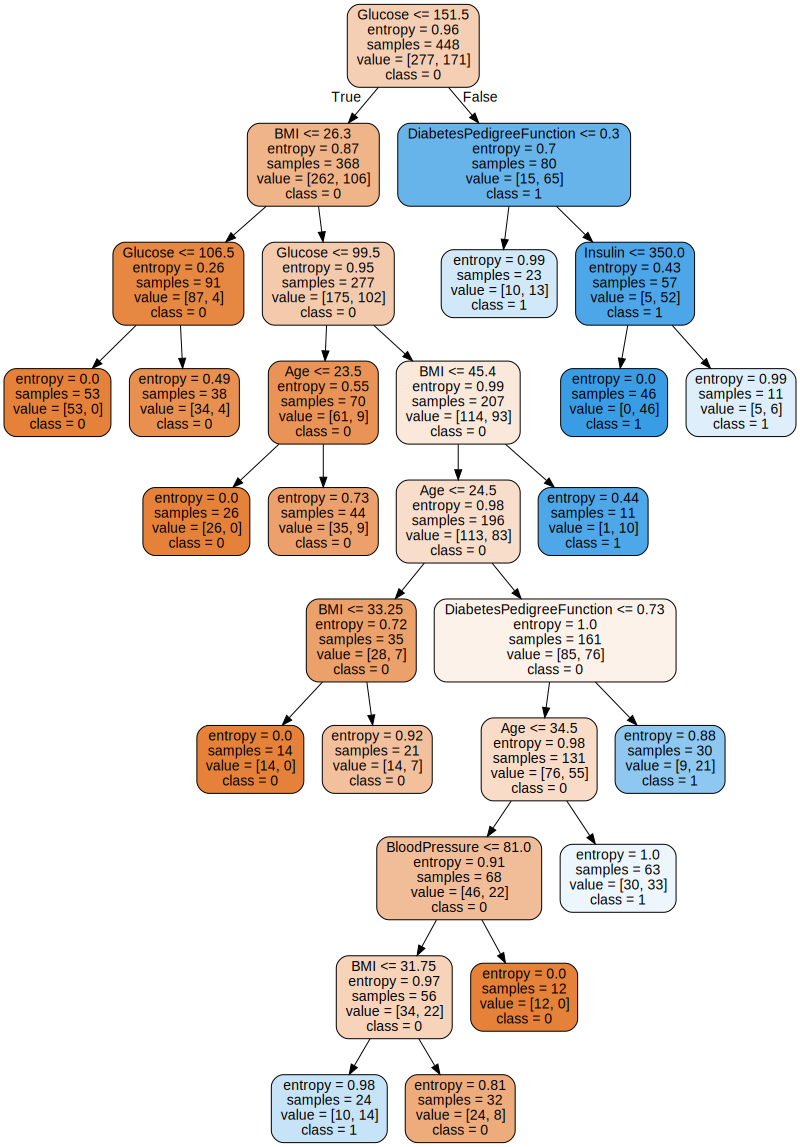

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

columns = list(X_train.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)



In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[71, 17],
       [10, 14]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        88
           1       0.45      0.58      0.51        24

    accuracy                           0.76       112
   macro avg       0.66      0.70      0.67       112
weighted avg       0.79      0.76      0.77       112



In [ ]:
clf.predict(df.iloc[[743], 0:-1])

array([1])